In [1]:
%matplotlib inline
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from scipy.stats import linregress
# Import the requests library
import requests
# Import the API key
from config import weather_api_key
from configure import g_key
# Import datetime module from datetime library
from datetime import datetime

In [2]:
# Create a set of random latitudes and longtitudes combinations
lats=np.random.uniform(-90, 90, size=1500)
lngs= np.random.uniform(-180, 180, size=1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Create a list for holding the cities
cities=[]
# Identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city= citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add city to the cities list
    if city not in cities:
        cities.append(city)
    
# Print city count
len(cities) 

633

In [4]:
# Starting the URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4da47acd65d1fcf05dbeb697bf2210c1


In [5]:
# Create an empty list to hold the weather data
city_data=[]

# Print thr beginning of the loggong
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count=1
set_count=1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all of the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50==0 and i >= 50):
        set_count +=1
        record_count =1
        
    # Create endpoint URL with each city
    city_url = url+'&q='+ city
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count+=1
    
    # Run API request for each city 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert the data to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    # If an error is experienced, skip the city
    except:
        print('City not found. Skipping '+ city)
        pass
# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | batagay
Processing Record 2 of Set 1 | zachagansk
City not found. Skipping zachagansk
Processing Record 3 of Set 1 | mayumba
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | aschersleben
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping sentyabrskiy
Processing Record 14 of Set 1 | monrovia
Processing Record 15 of Set 1 | sampit
Processing Record 16 of Set 1 | santa isabel
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | suao
City not found. Skipping suao
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping mys shmidta
Processing Record 20 of Set 1 | one hundred mile house
City not found. Skipping one hun

Processing Record 28 of Set 4 | matara
Processing Record 29 of Set 4 | pisco
Processing Record 30 of Set 4 | wajima
Processing Record 31 of Set 4 | barentsburg
City not found. Skipping barentsburg
Processing Record 32 of Set 4 | ngaoundere
Processing Record 33 of Set 4 | novouzensk
Processing Record 34 of Set 4 | tasiilaq
Processing Record 35 of Set 4 | severo-kurilsk
Processing Record 36 of Set 4 | constitucion
Processing Record 37 of Set 4 | komsomolskiy
Processing Record 38 of Set 4 | kizukuri
Processing Record 39 of Set 4 | vaitupu
City not found. Skipping vaitupu
Processing Record 40 of Set 4 | avarua
Processing Record 41 of Set 4 | leningradskiy
Processing Record 42 of Set 4 | monteagudo
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | shizuishan
Processing Record 45 of Set 4 | turangi
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | qasigiannguit
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | kahului
Processi

Processing Record 15 of Set 8 | sioux lookout
Processing Record 16 of Set 8 | lavrentiya
Processing Record 17 of Set 8 | yatou
Processing Record 18 of Set 8 | kedrovyy
Processing Record 19 of Set 8 | mineros
Processing Record 20 of Set 8 | ihosy
Processing Record 21 of Set 8 | muros
Processing Record 22 of Set 8 | odesskoye
Processing Record 23 of Set 8 | archidona
Processing Record 24 of Set 8 | dukat
Processing Record 25 of Set 8 | fairbanks
Processing Record 26 of Set 8 | saint-augustin
Processing Record 27 of Set 8 | jerantut
Processing Record 28 of Set 8 | sawakin
Processing Record 29 of Set 8 | watertown
Processing Record 30 of Set 8 | verkhnyaya inta
Processing Record 31 of Set 8 | abhar
Processing Record 32 of Set 8 | naantali
Processing Record 33 of Set 8 | tilichiki
Processing Record 34 of Set 8 | bud
Processing Record 35 of Set 8 | mocambique
City not found. Skipping mocambique
Processing Record 36 of Set 8 | mount gambier
Processing Record 37 of Set 8 | andenes
City not fou

Processing Record 45 of Set 11 | disna
City not found. Skipping disna
Processing Record 46 of Set 11 | hirara
Processing Record 47 of Set 11 | luderitz
Processing Record 48 of Set 11 | itaituba
Processing Record 49 of Set 11 | wulanhaote
City not found. Skipping wulanhaote
Processing Record 50 of Set 11 | todos santos
Processing Record 1 of Set 12 | camabatela
Processing Record 2 of Set 12 | santiago de cao
Processing Record 3 of Set 12 | hitoyoshi
Processing Record 4 of Set 12 | itapetinga
Processing Record 5 of Set 12 | umzimvubu
City not found. Skipping umzimvubu
Processing Record 6 of Set 12 | hambantota
Processing Record 7 of Set 12 | erzin
Processing Record 8 of Set 12 | kudahuvadhoo
Processing Record 9 of Set 12 | rawson
Processing Record 10 of Set 12 | gizo
Processing Record 11 of Set 12 | cayenne
Processing Record 12 of Set 12 | asyut
Processing Record 13 of Set 12 | tautira
Processing Record 14 of Set 12 | gazojak
Processing Record 15 of Set 12 | lorengau
Processing Record 16

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Batagay,67.65,134.64,-8.56,99,100,2.35,RU,2019-11-06 15:13:23
1,Mayumba,-3.44,10.65,81.00,75,7,8.79,GA,2019-11-06 15:13:23
2,Barrow,-38.31,-60.23,80.67,29,0,17.90,AR,2019-11-06 15:13:24
3,Laguna,16.17,-88.94,78.80,94,40,4.70,BZ,2019-11-06 15:13:24
4,Hobart,-42.88,147.33,46.40,67,75,12.75,AU,2019-11-06 15:13:24


In [31]:
# Reorder the columns
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Batagay,RU,2019-11-06 15:13:23,67.65,134.64,-8.56,99,100,2.35
1,Mayumba,GA,2019-11-06 15:13:23,-3.44,10.65,81.00,75,7,8.79
2,Barrow,AR,2019-11-06 15:13:24,-38.31,-60.23,80.67,29,0,17.90
3,Laguna,BZ,2019-11-06 15:13:24,16.17,-88.94,78.80,94,40,4.70
4,Hobart,AU,2019-11-06 15:13:24,-42.88,147.33,46.40,67,75,12.75


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Scatter plot for different lat different temp

In [34]:
# Extract relevant fieldd from the DataFrame
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [35]:
# Import the time module
import time
# get today's date in seconds
today = time.strftime('%x')
today

'11/06/19'

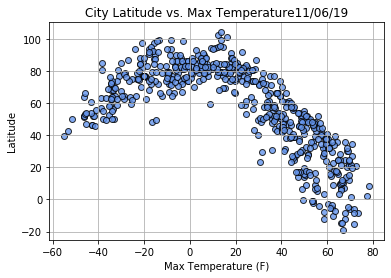

In [36]:
# Build the scatter plot for latitude vs. max temperaturr
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o", color='cornflowerblue',
            alpha=.8, label="Cities")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature'+ time.strftime('%x'))
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data\Fig1.png')

plt.show()

In [ ]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, marker='o', color='gold', edgecolor='black', linewidths=1, alpha=.8, label='Cities')
# Incorporate other graph properties
plt.title(f'City Latitude vs Humidity (%) ' +time.strftime('%x'))
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data\Fig2.png')
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter( lats, cloudiness, marker='o', color='limegreen', edgecolor='black', linewidths=1, alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) '+ time.strftime('%x'))
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig3.png')
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter( lats, wind_speed, marker='o', color='hotpink', edgecolor='black', linewidths=1, alpha=.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13

In [ ]:
# Create Northern and Southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,85))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the NOrthern Hemisphere cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (5,60))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

In [ ]:
# Create heatmaps

In [ ]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from configure import g_key